In [2]:
import pandas as pd

df = pd.read_csv("data/superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.shape

(9994, 21)

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [6]:
df['Order Date'].head()


0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]

In [7]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [8]:
monthly_sales = (
    df
    .groupby(df['Order Date'].dt.to_period('M'))['Sales']
    .sum()
    .reset_index()
)

monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales.head()


,Order Date,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


In [9]:
monthly_sales.shape


(48, 2)

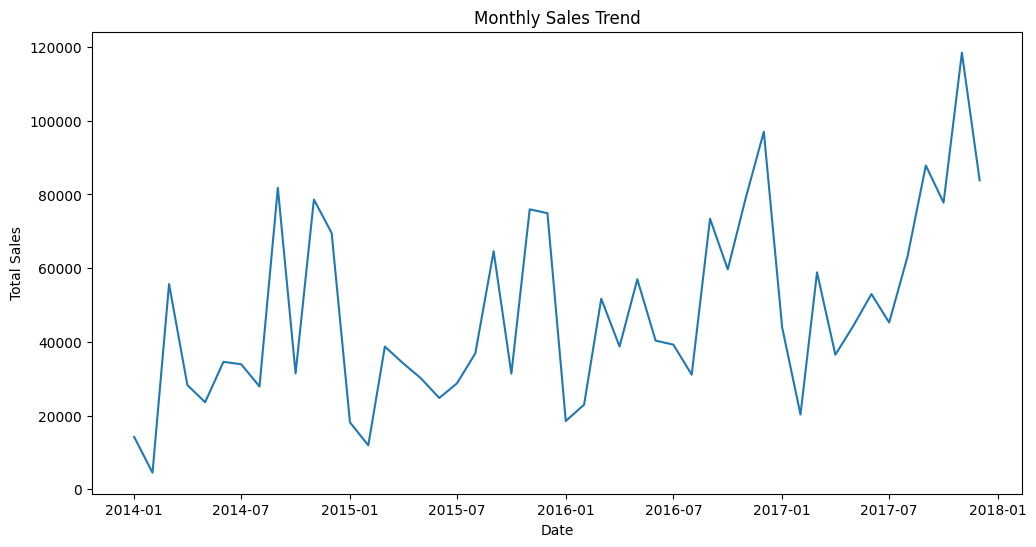

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


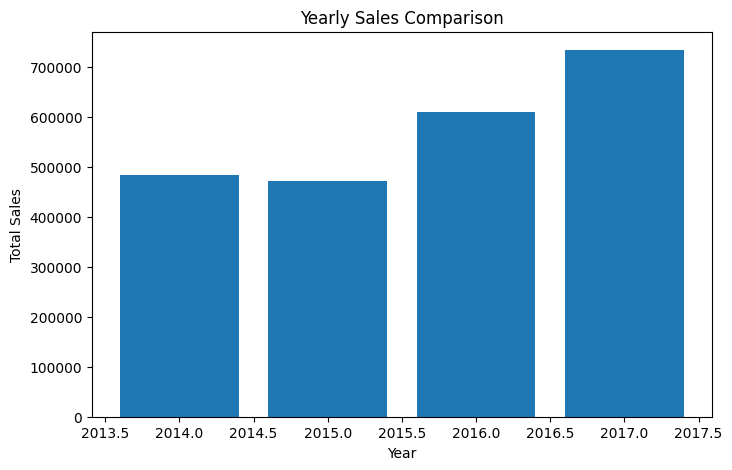

In [11]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'])
plt.title("Yearly Sales Comparison")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


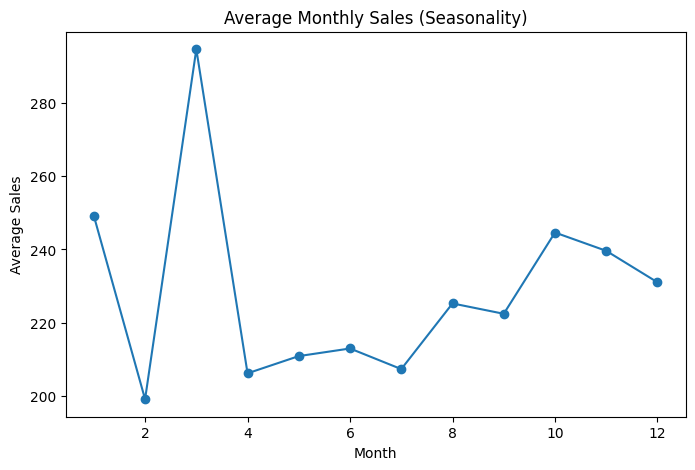

In [12]:
month_avg_sales = df.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(month_avg_sales['Month'], month_avg_sales['Sales'], marker='o')
plt.title("Average Monthly Sales (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [13]:
monthly_sales['Time_Index'] = range(len(monthly_sales))
monthly_sales.head()


,Order Date,Sales,Time_Index
0,2014-01-01,14236.895,0
1,2014-02-01,4519.892,1
2,2014-03-01,55691.009,2
3,2014-04-01,28295.345,3
4,2014-05-01,23648.287,4


In [14]:
X = monthly_sales[['Time_Index']]   # input
y = monthly_sales['Sales']          # output


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
future_time = pd.DataFrame({
    'Time_Index': range(len(monthly_sales), len(monthly_sales) + 6)
})

future_sales = model.predict(future_time)
future_sales


array([69957.53579787, 70859.54333018, 71761.55086249, 72663.55839481,
       73565.56592712, 74467.57345943])

In [17]:
last_date = monthly_sales['Order Date'].max()

future_dates = pd.date_range(
    start=last_date,
    periods=7,
    freq='M'
)[1:]

future_forecast = pd.DataFrame({
    'Order Date': future_dates,
    'Predicted Sales': future_sales
})

future_forecast


C:\Users\Manoj\AppData\Local\Temp\ipykernel_6128\453589922.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


,Order Date,Predicted Sales
0,2018-01-31,69957.535798
1,2018-02-28,70859.543330
2,2018-03-31,71761.550862
3,2018-04-30,72663.558395
4,2018-05-31,73565.565927
5,2018-06-30,74467.573459


In [18]:
forecast_plot_data = pd.concat([
    monthly_sales[['Order Date', 'Sales']].rename(columns={'Sales': 'Actual Sales'}),
    future_forecast.rename(columns={'Predicted Sales': 'Forecast Sales'})
], axis=0)


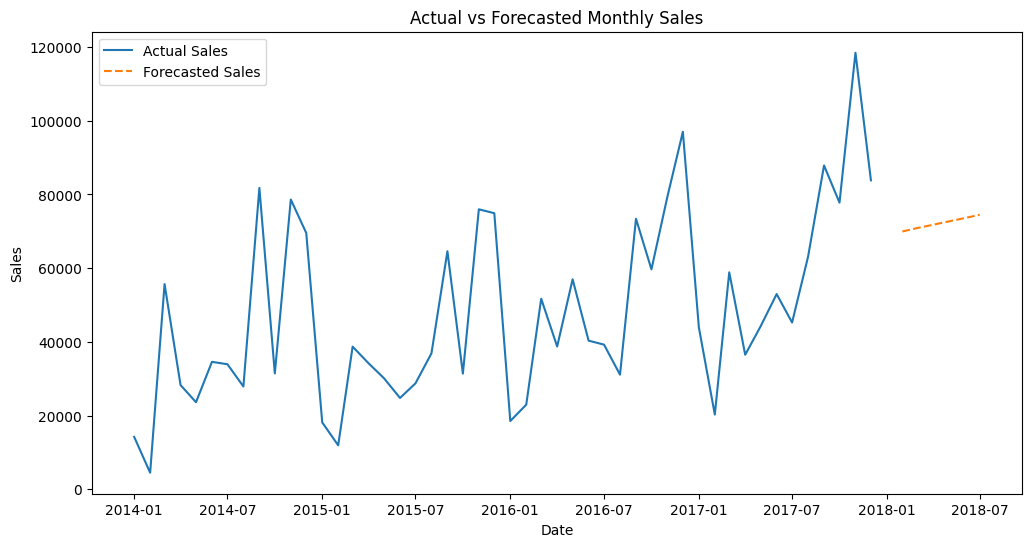

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual sales
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    label='Actual Sales'
)

# Forecast sales
plt.plot(
    future_forecast['Order Date'],
    future_forecast['Predicted Sales'],
    linestyle='--',
    label='Forecasted Sales'
)

plt.title("Actual vs Forecasted Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [20]:
future_time_12 = pd.DataFrame({
    'Time_Index': range(len(monthly_sales), len(monthly_sales) + 12)
})


In [21]:
future_sales_12 = model.predict(future_time_12)
future_sales_12


array([69957.53579787, 70859.54333018, 71761.55086249, 72663.55839481,
       73565.56592712, 74467.57345943, 75369.58099174, 76271.58852405,
       77173.59605636, 78075.60358867, 78977.61112098, 79879.61865329])

In [22]:
last_date = monthly_sales['Order Date'].max()

future_dates_12 = pd.date_range(
    start=last_date,
    periods=13,
    freq='M'
)[1:]


C:\Users\Manoj\AppData\Local\Temp\ipykernel_6128\148939282.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates_12 = pd.date_range(


In [23]:
future_forecast_12 = pd.DataFrame({
    'Order Date': future_dates_12,
    'Predicted Sales': future_sales_12
})

future_forecast_12


,Order Date,Predicted Sales
0,2018-01-31,69957.535798
1,2018-02-28,70859.543330
2,2018-03-31,71761.550862
3,2018-04-30,72663.558395
4,2018-05-31,73565.565927
5,2018-06-30,74467.573459
6,2018-07-31,75369.580992
7,2018-08-31,76271.588524
8,2018-09-30,77173.596056
9,2018-10-31,78075.603589


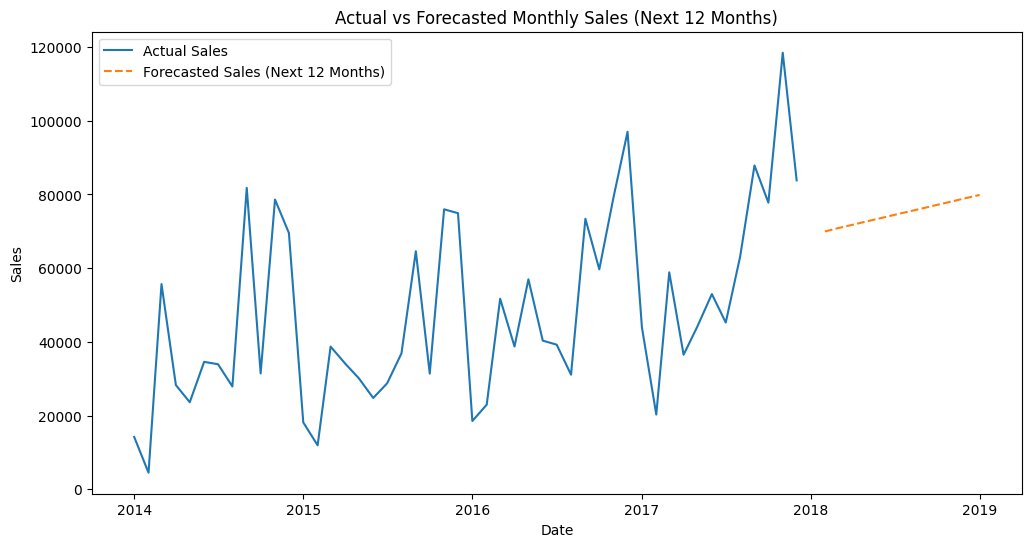

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual sales
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    label='Actual Sales'
)

# 12-month forecast
plt.plot(
    future_forecast_12['Order Date'],
    future_forecast_12['Predicted Sales'],
    linestyle='--',
    label='Forecasted Sales (Next 12 Months)'
)

plt.title("Actual vs Forecasted Monthly Sales (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [25]:
monthly_sales['Month'] = monthly_sales['Order Date'].dt.month


In [26]:
X = monthly_sales[['Time_Index', 'Month']]
y = monthly_sales['Sales']


In [27]:
from sklearn.linear_model import LinearRegression

seasonal_model = LinearRegression()
seasonal_model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
future_time_12 = pd.DataFrame({
    'Time_Index': range(len(monthly_sales), len(monthly_sales) + 12),
    'Month': [(monthly_sales['Month'].iloc[-1] + i - 1) % 12 + 1 for i in range(1, 13)]
})


In [29]:
future_sales_12 = seasonal_model.predict(future_time_12)


In [30]:
future_forecast_12 = pd.DataFrame({
    'Order Date': future_dates_12,
    'Predicted Sales': future_sales_12
})


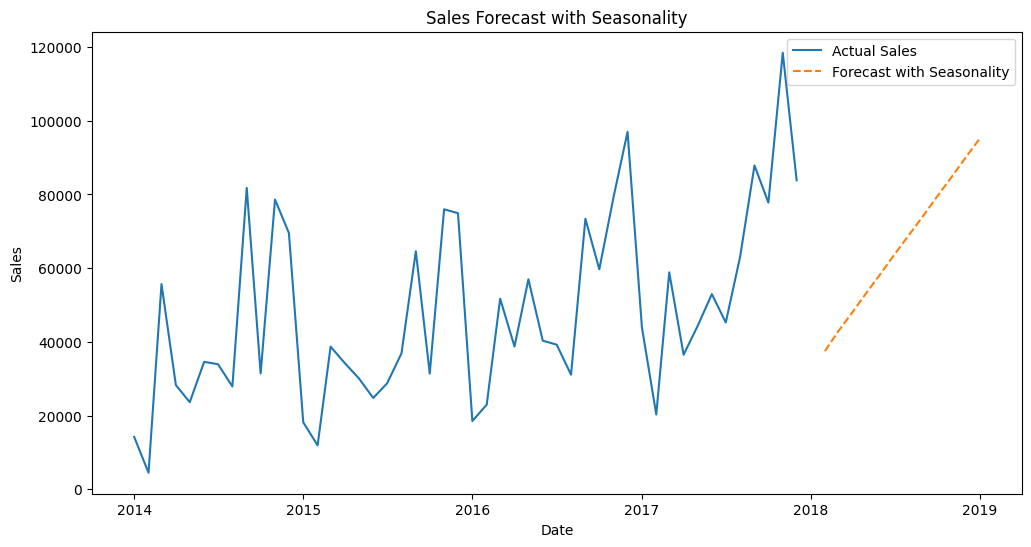

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    label='Actual Sales'
)

plt.plot(
    future_forecast_12['Order Date'],
    future_forecast_12['Predicted Sales'],
    linestyle='--',
    label='Forecast with Seasonality'
)

plt.title("Sales Forecast with Seasonality")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [32]:
X = monthly_sales[['Time_Index']]
y = monthly_sales['Sales']


In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # degree=2 gives smooth curves
X_poly = poly.fit_transform(X)


In [34]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(X_poly, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
future_time_12 = pd.DataFrame({
    'Time_Index': range(len(monthly_sales), len(monthly_sales) + 12)
})

future_time_poly = poly.transform(future_time_12)


In [36]:
future_sales_12 = poly_model.predict(future_time_poly)


In [37]:
future_forecast_12 = pd.DataFrame({
    'Order Date': future_dates_12,
    'Predicted Sales': future_sales_12
})

future_forecast_12


,Order Date,Predicted Sales
0,2018-01-31,78619.093936
1,2018-02-28,80581.700424
2,2018-03-31,82586.730870
3,2018-04-30,84634.185275
4,2018-05-31,86724.063637
5,2018-06-30,88856.365958
6,2018-07-31,91031.092237
7,2018-08-31,93248.242475
8,2018-09-30,95507.816670
9,2018-10-31,97809.814824


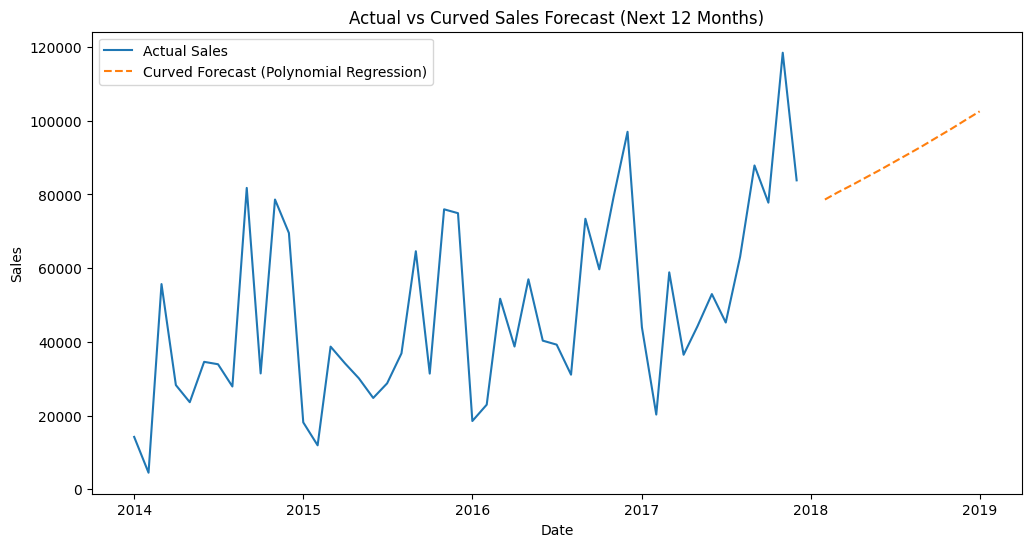

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual sales
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    label='Actual Sales'
)

# Curved forecast
plt.plot(
    future_forecast_12['Order Date'],
    future_forecast_12['Predicted Sales'],
    linestyle='--',
    label='Curved Forecast (Polynomial Regression)'
)

plt.title("Actual vs Curved Sales Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [39]:
# Predict sales for all historical months
X_all = monthly_sales[['Time_Index']]
X_all_poly = poly.transform(X_all)

monthly_sales['Poly_Predicted_Sales'] = poly_model.predict(X_all_poly)


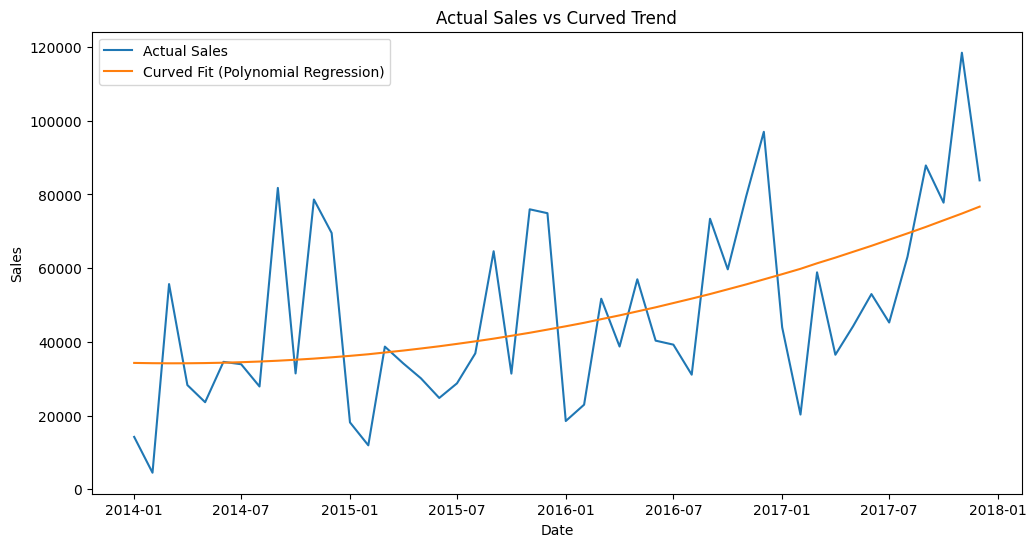

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual sales (zig-zag line)
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Sales'],
    label='Actual Sales'
)

# Polynomial fitted curve (SMOOTH CURVE)
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Poly_Predicted_Sales'],
    label='Curved Fit (Polynomial Regression)'
)

plt.title("Actual Sales vs Curved Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [41]:
future_time_12 = pd.DataFrame({
    'Time_Index': range(len(monthly_sales), len(monthly_sales) + 12)
})

future_time_poly = poly.transform(future_time_12)
future_sales_12 = poly_model.predict(future_time_poly)


In [42]:
future_forecast_12 = pd.DataFrame({
    'Order Date': future_dates_12,
    'Predicted Sales': future_sales_12
})


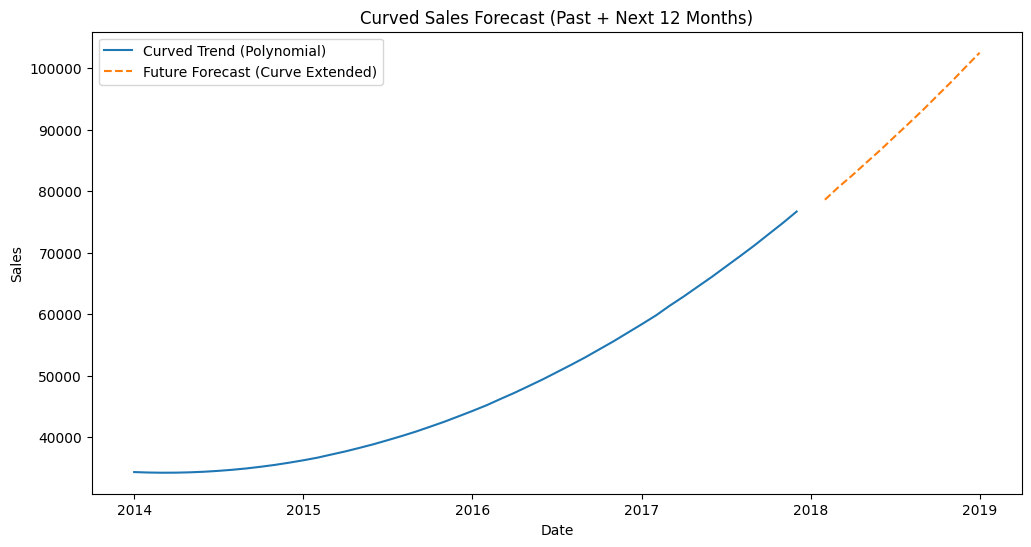

In [43]:
plt.figure(figsize=(12, 6))

# Curved fit on historical data
plt.plot(
    monthly_sales['Order Date'],
    monthly_sales['Poly_Predicted_Sales'],
    label='Curved Trend (Polynomial)'
)

# Future continuation of curve
plt.plot(
    future_forecast_12['Order Date'],
    future_forecast_12['Predicted Sales'],
    linestyle='--',
    label='Future Forecast (Curve Extended)'
)

plt.title("Curved Sales Forecast (Past + Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
